Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats;
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.stats import zscore

# 1.Data Understanding:

1.A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [2]:
df_N=pd.read_csv("Normal.csv")
df_H=pd.read_csv("Type_H.csv")
df_S=pd.read_csv("Type_S.csv")

1.B Print Shape and columns of all the 3 DataFrames

In [3]:
print("Shape of First Data Set/DataFrame",df_N.shape)
print("Column Names of First Data Set/DataFrame",df_N.shape)
print("Shape of Second Data Set/DataFrame",df_H.shape)
print("Column Names of Second Data Set/DataFrame",df_H.shape)
print("Shape of Third Data Set/DataFrame",df_S.shape)
print("Column Names of Third Data Set/DataFrame",df_S.shape)

Shape of First Data Set/DataFrame (100, 7)
Column Names of First Data Set/DataFrame (100, 7)
Shape of Second Data Set/DataFrame (60, 7)
Column Names of Second Data Set/DataFrame (60, 7)
Shape of Third Data Set/DataFrame (150, 7)
Column Names of Third Data Set/DataFrame (150, 7)


1.C Compare Column names of all the 3 DataFrames and clearly write observations

In [4]:
print("Column Comaprision Normal & H",df_N.columns==df_H.columns)
print("Column Comaprision Normal & S",df_N.columns==df_S.columns)
print("Column Comaprision Normal & S",df_H.columns==df_S.columns)

Column Comaprision Normal & H [ True  True  True  True  True  True  True]
Column Comaprision Normal & S [ True  True  True  True  True  True  True]
Column Comaprision Normal & S [ True  True  True  True  True  True  True]


Observation : 
    All 3 Data frame has 7 Columns but have different rows 
    Each column in data frames are same also in same sequence

1.D Print DataTypes of all the 3 DataFrames.

In [5]:
print("First Normal Data sets ",df_N.dtypes)
print("Second  H Data sets ",df_H.dtypes)
print("Third S Data sets ",df_S.dtypes)

First Normal Data sets  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
Second  H Data sets  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
Third S Data sets  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


1.E Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

In [6]:
df_S['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

In [7]:
df_N['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [8]:
df_H['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

Observations : 
Class feature has differnent values in each dataframe.Need to consolidate values 
Type_S    133
tp_s       17

Normal    73
Nrmal     27

Type_H    37
type_h    23

# 2 Data Preparation and Exploration: 

In [ ]:
2.A Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [10]:
df_S.loc[df_S['Class']=='tp_s','Class']='Type_S'
df_N.loc[df_N['Class']=='Nrmal','Class']='Normal'
df_H.loc[df_H['Class']=='type_h','Class']='Type_H'

2.B Combine all the 3 DataFrames to form a single DataFrame 

In [12]:
df=df_N.append([df_H,df_S],ignore_index=True)
df.shape

(310, 7)

2.C Print 5 random samples of this DataFrame

In [13]:
df.sample(n=5)

P_incidence     P_tilt     L_angle    S_slope    P_radius   S_Degree  \
242    85.290173  18.278890  100.744220  67.011283  110.660701  58.884948   
165    83.933009  41.286305   62.000000  42.646703  115.012334  26.588100   
227    80.433428  16.998479   66.536018  63.434949  116.438981  57.781250   
20     65.611802  23.137919   62.582179  42.473883  124.128001  -4.083298   
251    48.030624   3.969815   58.344519  44.060809  125.350962  35.000078   

      Class  
242  Type_S  
165  Type_S  
227  Type_S  
20   Normal  
251  Type_S

2.D Print Feature-wise percentage of Null values

In [14]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [15]:
df.isnull().sum() / df.shape[0] * 100.00

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

Observation:
    
    There is no Null values for each feature

2.E Check 5-point summary of the new DataFrame.

In [16]:
df.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

# 3.Data Analysis

3.A Visualize a heatmap to understand correlation between all features 

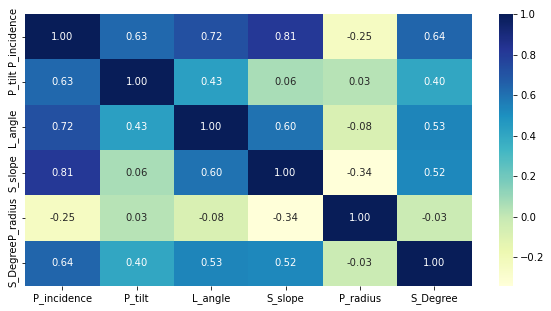

In [17]:
plt.figure(figsize=(10,5))
corrmat = df.corr(method='pearson')
sns.heatmap(corrmat, cmap="YlGnBu", fmt='.2f',annot=True)
plt.show();

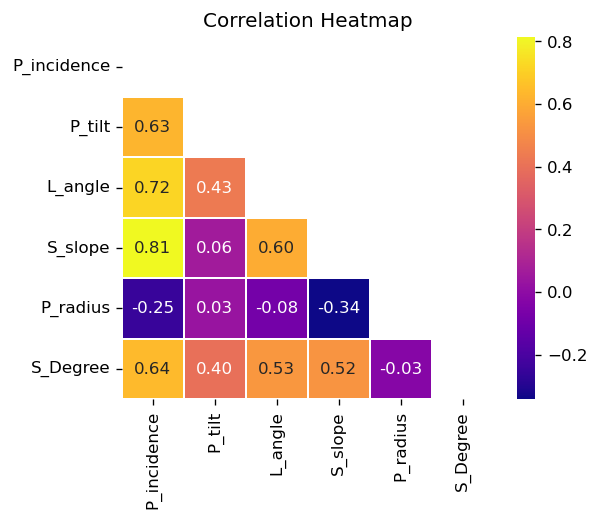

In [18]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

3.B. Share insights on correlation.

A. Features having stronger correlation with correlation value.

Correlation between S_slope and p_incidence have high correlation(0.81)
Correlation between L_angle and p_incidence have high correlation(0.72)


B. Features having weaker correlation with correlation value.

p_radius and p_tilt has weaker correlation(0.03)
S_degree and p_radius has negative weaker correlation(-0.03)

3.C Visualize a pairplot with 3 classes distinguished by colors and share insights

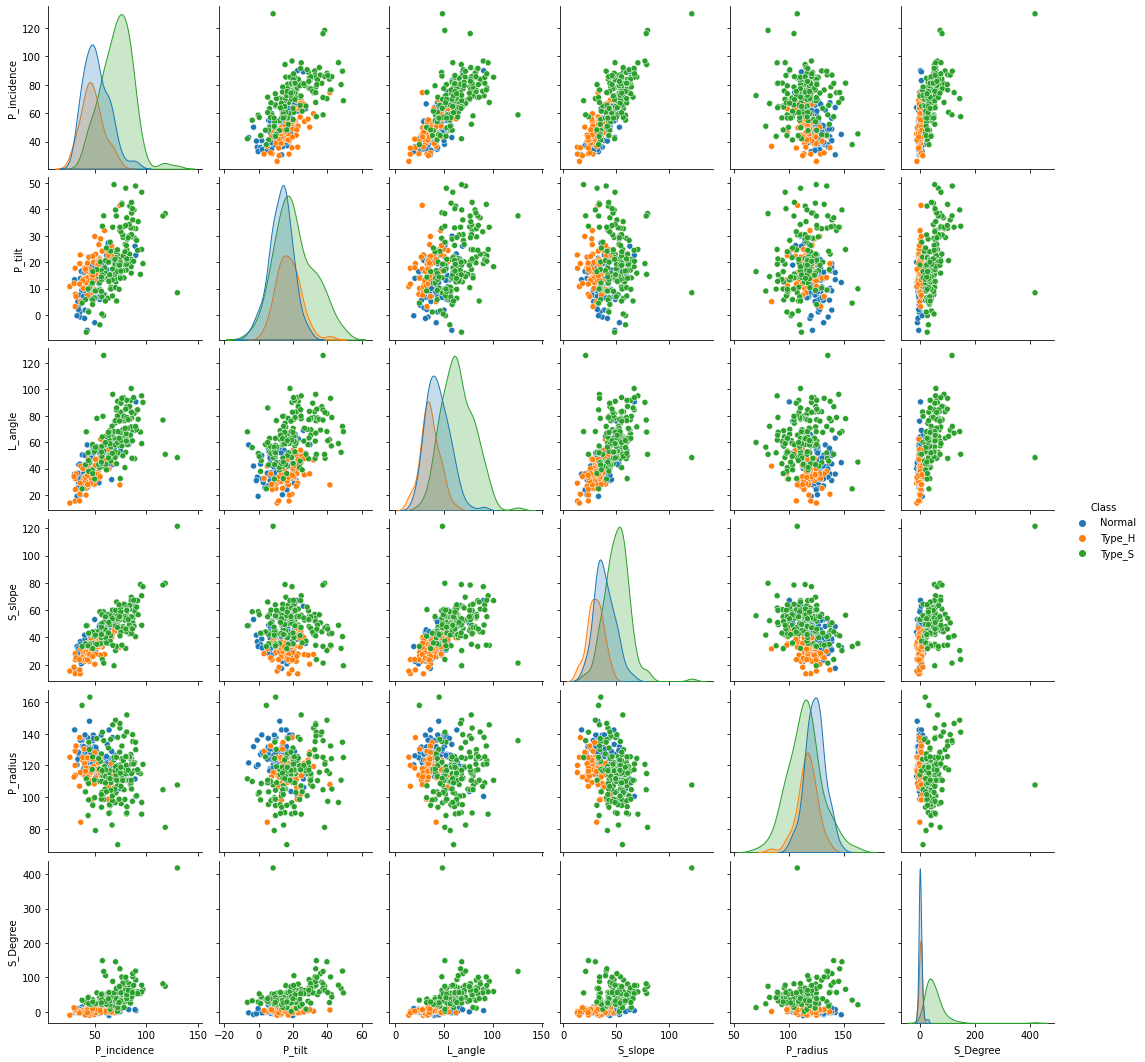

In [19]:
#columns = df.columns.drop('Class');
#dflist = df[columns]
sns.pairplot(df,hue ='Class')
plt.show()

P_incidence has postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle

P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius

L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius

s_slope has positive Relationship with L_angle and s_degree

p_radius has no Relationship with s_degree,p_tilt,l_angle.

S_degree has no strong positive Relationship with any of the variables.

3.D Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

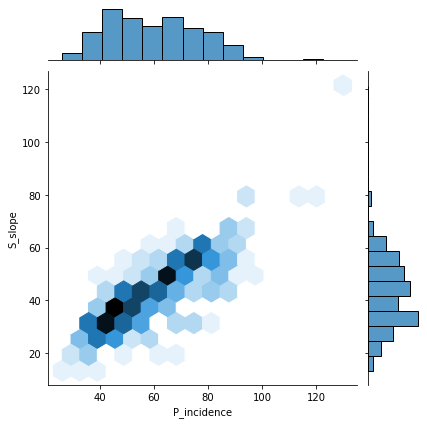

In [20]:
sns.jointplot(x = "P_incidence", y = "S_slope",
              kind = "hex", data = df)
# show the plot
plt.show()

  

Observation : 
-P_incidence,S_slope have high positive correlation 
-Distribution of data also normal curve and will be good regression model



3.E Visualize a boxplot to check distribution of the features and share insights.

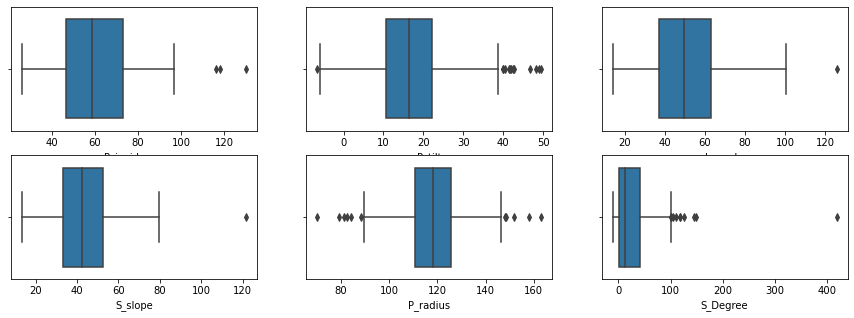

In [21]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(x=df['P_incidence'],ax=ax[0][0],orient='h');
sns.boxplot(x=df['P_tilt'],ax=ax[0][1]);
sns.boxplot(x=df['L_angle'],ax=ax[0][2]);
sns.boxplot(x=df['S_slope'],ax=ax[1][0]);
sns.boxplot(x=df['P_radius'],ax=ax[1][1]);
sns.boxplot(x=df['S_Degree'],ax=ax[1][2]);
plt.show()

In [ ]:
P_incidence 
    - Total Number of outliers in P_incidence: 3
    - Normality is maintained with very less extreme values
    - We can see three outliers exists in the column
P_tilt
    - Total Number of outliers in P_tilt: 13
    - Data is Normally distributed and we can see one peakness in the center
    - It is has little skewness towards right side
    - We can see one outlier in negative end and few outliers in positive end
L_angle
    - Total Number of outliers in L_angle: 1
    - It is Normally distributed
    - Little right skewness because of one outlier
S_slope
    - Total Number of outliers in S_slope: 1
    - There is right skewness due to one outlier
P_radius
    - Total Number of outliers in P_radius: 11
    - Data is normally distributed
    - We can see outliers at both the ends.
S_Degree
    - Total Number of outliers in S_Degree: 10
    - There is Positive Skewness in the data
    - Hugely affected by Outliers

# 4. Model Building

Checking on Target Imbalance


In [22]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

We have imbalanced target variable
Every class is not equally distributed.
48% of data is occupied by Type_S
When you have imbalance dataset model does not learn about less distributed classes.
This gives poor performance in unseen data

4 A. Split data into X and Y

In [23]:
X=df.drop(columns='Class')
y=df['Class'] #target

In [24]:
print(X)

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910
..           ...        ...        ...        ...         ...         ...
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799

[310 rows x 6 columns]


In [25]:
print(y)

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
305    Type_S
306    Type_S
307    Type_S
308    Type_S
309    Type_S
Name: Class, Length: 310, dtype: object


Scaling Independent Variables

In [26]:
X_Scaled=X.apply(zscore)

In [27]:
X_Scaled.describe().T

count          mean       std       min       25%       50%  \
P_incidence  310.0  1.042177e-16  1.001617 -1.996010 -0.817398 -0.104925   
P_tilt       310.0  2.096889e-16  1.001617 -2.411664 -0.688114 -0.118606   
L_angle      310.0  1.980495e-16  1.001617 -2.047652 -0.806027 -0.127862   
S_slope      310.0  2.829278e-17  1.001617 -2.207741 -0.716842 -0.040960   
P_radius     310.0 -5.071212e-16  1.001617 -3.597963 -0.542383  0.026138   
S_Degree     310.0 -1.277204e-16  1.001617 -0.996172 -0.658507 -0.387450   

                  75%        max  
P_incidence  0.719464   4.029206  
P_tilt       0.458116   3.191402  
L_angle      0.597549   3.984615  
S_slope      0.726941   5.855771  
P_radius     0.567621   3.395818  
S_Degree     0.399768  10.460350

We have scaled independent variables to corresponding z-score.

We can see Mean becomes close to zero and Standard Deviation becomes 1

4.B Split data into train and test with 80:20 proportion. 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [29]:
y_train.value_counts()

Type_S    120
Normal     83
Type_H     45
Name: Class, dtype: int64

4.C Train a Supervised Learning Classification base model using KNN classifier.

Build Simple Model 

In [30]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' ) #Building knn with 5 neighbors

In [31]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [32]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7096774193548387

In [33]:
print('Accuracy on Training data:',NNH.score(X_train, y_train) )
print('Accuracy on Test data:',NNH.score(X_test, y_test) )

Accuracy on Training data: 1.0
Accuracy on Test data: 0.7096774193548387


Confusion Matrix


<AxesSubplot:>

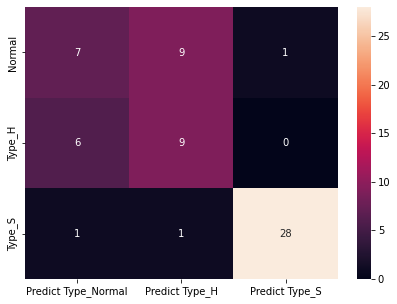

In [34]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_H","Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Predict Type_Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

4.d Print all the possible performance metrics for both train and test data

In [35]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.50      0.41      0.45        17
      Type_H       0.47      0.60      0.53        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.71        62
   macro avg       0.65      0.65      0.64        62
weighted avg       0.72      0.71      0.71        62



Precision for Normal class: It tells,out of all predicted normal class what fraction are predicted correctly

Recall(sensitivity or TPR) for Normal class: Out of all actual Normal class how much fraction we identified correctly

Normal predicted correctly for 50% of time. similary for Type H for 47% and Type S 97%

We have maximum F1 score for Type S

# 5. Performance Improvement:

5.A Experiment with various parameters to improve performance of the base model

Finding best K value

In [36]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

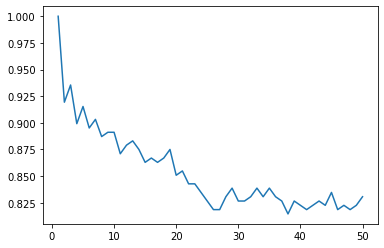

In [37]:
plt.plot(range(1,51),train_score)
plt.show()

Here training accuracy decreases when increase k value

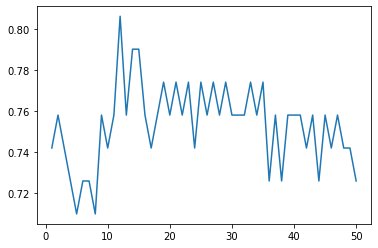

In [38]:
plt.plot(range(1,51),test_score)
plt.show()

The maximum accuracy occures when k is less than 20.

We will fix k value as less than 20.

In [39]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7419354838709677:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62

Accuracy on Training data for k 3 is 0.9354838709677419:
Accuracy on Test data for k 3 is 0.7419354838709677:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74     

For K=13 we have balanced train and test error

we can use k value as 13 because when we increase this value the precision becomes100% for class 2

Coculustion & Improvement

All the variables has significant effect on target class

class belongs to type_s has higher mean value for alomst all variables

Class belongs to normal has lower values for all variables

For almost all variables the distribution is normal

For Knn, k=13 we are getting balanced train and test error

We can use KNN as a final model because of balanced train and test error also the recall and precision values are good

Clear description on each variables may help to understand problem statement better because of medical domain